In [1]:
#Reading the ratings dataset

import numpy as np
import pandas as pd

df=pd.read_excel('Ratings1M.xlsx', index_col=None, header = None)


In [2]:
df.columns=['UserId','MovieId','Ratings','Timestamp']

In [3]:
df

,UserId,MovieId,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [4]:
#Reading the movies dataset
df2=pd.read_excel('movies1M.xlsx', index_col=None, header = None)

In [5]:
df2.columns=['MovieId','Name','Genre']
df2

,MovieId,Name,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [6]:
r_arr=df.values
r_arr

array([[        1,      1193,         5, 978300760],
       [        1,       661,         3, 978302109],
       [        1,       914,         3, 978301968],
       ...,
       [     6040,       562,         5, 956704746],
       [     6040,      1096,         4, 956715648],
       [     6040,      1097,         4, 956715569]], dtype=int64)

In [7]:
n_users=df['UserId'].max()
n_items=df['MovieId'].max()
n_items

3952

In [8]:
#Creating a matrix to store the ratings,with userid and movieid as row-number and column-number respectively:

r=np.zeros((n_users+1,n_items+1))
for i in range(n_users+1):
    if (i==0):
        r[i]=np.zeros(n_items+1)
    else:
        label=df[df['UserId']==i].index.tolist() 
        m=np.zeros(len(label))
        m=r_arr[int(label[0]):int(label[len(label)-1])+1,1]
        r_list=np.zeros(len(label))
        rlist=r_arr[int(label[0]):int(label[len(label)-1])+1,2]
        for k in range (len(label)):
            r[i][int(m[k])]=rlist[k]

In [9]:
R = np.delete(r, (0), axis=0)
R = np.delete(R, (0), axis=1)
R

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

In [10]:
R.shape

(6040, 3952)

In [11]:
R[6036-1][62-1]

1.0

In [13]:
#creating a training set with 95% of given datas:

import random
a=r_arr.shape[0]
b=0.95*a
x=random.sample(range(0, int(a)),int(b))
dftrain=df.iloc[x]
dftrain

,UserId,MovieId,Ratings,Timestamp
898154,5431,2424,4,960069574
646850,3892,3593,1,965799070
332414,1961,3911,4,974686640
211025,1285,1376,5,975458074
420313,2540,368,4,974047469
...,...,...,...,...
884690,5343,1197,4,960681931
741821,4433,950,4,965099075
332472,1962,2265,3,975363743
415702,2504,1682,5,974084896


In [14]:
dftrain
dftrain=dftrain.sort_values(by=['UserId','MovieId'])
dftrain
dftrain = dftrain.reset_index(drop=True)

In [15]:
dftrain

,UserId,MovieId,Ratings,Timestamp
0,1,1,5,978824268
1,1,48,5,978824351
2,1,150,5,978301777
3,1,260,4,978300760
4,1,527,5,978824195
...,...,...,...,...
950193,6040,3683,4,960971696
950194,6040,3703,4,964828575
950195,6040,3735,4,960971654
950196,6040,3751,4,964828782


In [16]:
#creating test set:
dftest = df[~df.index.isin(dftrain.index)]

In [17]:
r_arrtrain=dftrain.values
r_arrtrain

array([[        1,         1,         5, 978824268],
       [        1,        48,         5, 978824351],
       [        1,       150,         5, 978301777],
       ...,
       [     6040,      3735,         4, 960971654],
       [     6040,      3751,         4, 964828782],
       [     6040,      3819,         5, 963272166]], dtype=int64)

In [18]:
#creating rating matrix for training dataset

rtrain=np.zeros((n_users+1,n_items+1))
i=0
for i in range(n_users+1):
    if (i==0):
        rtrain[i]=np.zeros(n_items+1)
    else:
        label=dftrain[dftrain['UserId']==i].index.tolist() 
        m=np.zeros(len(label))
        m=r_arrtrain[int(label[0]):int(label[len(label)-1])+1,1]
        r_list=r_arrtrain[int(label[0]):int(label[len(label)-1])+1,2]
        k=0
        for k in range (len(label)):
            rtrain[i][int(m[k])]=r_list[k]

Rtrain = np.delete(rtrain, (0), axis=0)
Rtrain = np.delete(Rtrain, (0), axis=1)
Rtrain

# Probabilistic Matrix Factorization

In [88]:
class MF():
    
    def __init__(self,R,K, alpha,beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
    
    #function to train model
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items,self.K))
    
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])
        
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]
            
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 10 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process   
    
    #function to find mean square error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    #function for stochastic gradient descent
    def sgd(self):
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            # Update user and item latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    #matrix to find rating
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    #Compute the full matrix using the resultant biases, P and Q
    def full_matrix(self):
        return self.b + self.b_u[:,np.newaxis] + self.b_i[np.newaxis:,] + self.P.dot(self.Q.T)

In [21]:
#Applying MF on training set only
mf = MF(Rtrain, K=50,alpha=0.02, beta=0.01, iterations=200)
training_process = mf.train()
print()

Iteration: 10 ; error = 609.8713
Iteration: 20 ; error = 551.2423
Iteration: 30 ; error = 534.9277
Iteration: 40 ; error = 527.2681
Iteration: 50 ; error = 522.4564
Iteration: 60 ; error = 519.4959
Iteration: 70 ; error = 517.3356
Iteration: 80 ; error = 516.0328
Iteration: 90 ; error = 514.7400
Iteration: 100 ; error = 513.6773
Iteration: 110 ; error = 512.3654
Iteration: 120 ; error = 511.8324
Iteration: 130 ; error = 511.4906
Iteration: 140 ; error = 510.7151
Iteration: 150 ; error = 510.1540
Iteration: 160 ; error = 509.7662
Iteration: 170 ; error = 509.7126
Iteration: 180 ; error = 509.0185
Iteration: 190 ; error = 508.9985
Iteration: 200 ; error = 508.7931



In [89]:
pred= mf.full_matrix()
print("P x Q:")
print(mf.full_matrix())
print()
print("Global bias:")
print(mf.b)
print()
print("User bias:")
print(mf.b_u)
print()
print("Item bias:")
print(mf.b_i)

P x Q:
[[4.79425831 3.71380327 2.79287129 ... 4.15019536 4.0578095  2.82194846]
 [3.90352373 4.02065112 5.23002061 ... 3.56841689 3.97569406 2.91183719]
 [3.61487969 2.75989549 3.58177847 ... 3.72348453 2.46383544 3.8712152 ]
 ...
 [3.75664147 3.41517495 2.17766288 ... 2.94538094 4.72023318 3.98411512]
 [4.32965434 2.4195541  3.6938391  ... 4.66832631 4.74494821 4.87579148]
 [3.6505942  2.13892094 1.35764123 ... 2.89962398 3.92623729 3.93062887]]

Global bias:
3.581564453029317

User bias:
[-0.06553905 -0.20936973  0.14989713 ... -0.09546073  0.06700773
 -0.41361855]

Item bias:
[ 0.57243566 -0.40164196 -0.47545639 ...  0.20825795  0.02964751
  0.19650994]


In [90]:
dfest=dftest.sort_values(by=['UserId','MovieId'])
dftest = dftest.reset_index(drop=True)
r_arrtest=dftest.values
nrows=r_arrtest.shape[0]

In [91]:
#finding the cross validation error
crossval_error=0
for i in range(nrows):
    crossval_error=crossval_error + pow(r_arrtest[i][2]-pred[int(r_arrtest[i][0])-1][int(r_arrtest[i][1])-1],2)

crossval_error=sqrt(crossval_error)/(nrows)
crossval_error

0.29268558436444936

In [92]:
import matplotlib
import matplotlib.pyplot as plt

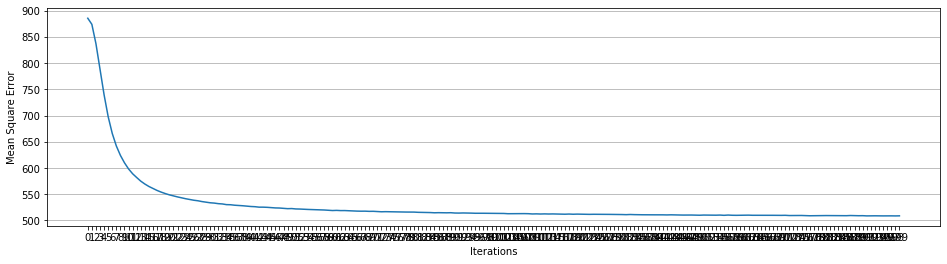

In [93]:

x = [x for x, y in training_process]
y = [y for x, y in training_process]
plt.figure(figsize=((16,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.xlabel("Iterations")
plt.ylabel("Mean Square Error")
plt.grid(axis="y")

In [94]:
#Applying MF on full ratings matrix
mf = MF(R, K=50,alpha=0.02, beta=0.01, iterations=200)
training_process = mf.train()
print()
predmatrix= mf.full_matrix()


Iteration: 10 ; error = 629.5380
Iteration: 20 ; error = 574.1578
Iteration: 30 ; error = 558.6936
Iteration: 40 ; error = 551.1076
Iteration: 50 ; error = 546.4185
Iteration: 60 ; error = 543.7858
Iteration: 70 ; error = 541.4972
Iteration: 80 ; error = 540.0270
Iteration: 90 ; error = 538.6507
Iteration: 100 ; error = 537.9872
Iteration: 110 ; error = 537.2215
Iteration: 120 ; error = 536.3718
Iteration: 130 ; error = 535.4024
Iteration: 140 ; error = 535.1080
Iteration: 150 ; error = 534.5125
Iteration: 160 ; error = 534.4606
Iteration: 170 ; error = 533.9343
Iteration: 180 ; error = 533.9483
Iteration: 190 ; error = 532.9537
Iteration: 200 ; error = 533.2614



In [95]:
print('Give UserId and MovieId')
UserId=input()
MovieId=input()


Give UserId and MovieId
6040
1090


In [96]:
rating=predmatrix[int(UserId)-1][int(MovieId)-1]
print('The estimated rating is: ' + str(rating))


The estimated rating is: 2.9696597745845272


In [97]:
#Finding the top 5 movies for the user:

ratedmovies=np.zeros(n_items)
ratedmovies=predmatrix[(UserId-1)]
alreadyrated=R[int(UserId)-1]
non_rated=ratedmovies-alreadyrated
top_5_idx = np.argsort(non_rated)[-5:]

top_5=top_5_idx + 1
top_5= np.fliplr([top_5])[0]
Finalmatrix=np.empty((5,2))
Finalmatrix=Finalmatrix.astype('str')

for i in range (5):
    index=df2[df2['MovieId']==top_5[i]].index.values
    Finalmatrix[i][0]=df2.iloc[int(index)][1]
    Finalmatrix[i][1]=df2.iloc[int(index)][2]

Top5movies= pd.DataFrame({'Movie Name': Finalmatrix[:,0], 'Genre' : Finalmatrix[:,1]})
print('The top 5 movies rated by user ' + str(UserId) +  'are:')
Top5movies

The top 5 movies rated by user 6040are:


,Movie Name,Genre
0,Ghost Dog:The Way of the Samurai,Crime|Drama
1,Yojimbo (1961),Comedy|Drama|Western
2,Pather Panchali (1955),Drama
3,"Bank Dick, The (1940)",Comedy
4,"Education of Little Tree, The (1",Drama
